## K Nearest Neighbour Classifer

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score


In [3]:
X,y=make_classification(
    n_samples=1000,
    n_features=3,
    n_redundant=1,
    n_classes=2,
    random_state=999
)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
classifer=KNeighborsClassifier(n_neighbors=5,algorithm='auto',p=2)
classifer.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
y_pred=classifer.predict(X_test)

In [13]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[158  20]
 [ 11 141]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

0.906060606060606


In [26]:
#model tunning
param_grid={
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [29]:
classifer=KNeighborsClassifier()
grid_serch=GridSearchCV(
    estimator=classifer,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_serch.fit(X_train,y_train)
print('Best parameters:',grid_serch.best_params_)
print('Best CV score:',grid_serch.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best CV score: 0.9029850746268657


In [32]:
best_knn =grid_serch.best_estimator_

y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:,1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)


Confusion Matrix:
[[156  13]
 [ 16 145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.92      0.90      0.91       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330


ROC-AUC Score: 0.9639825057885258


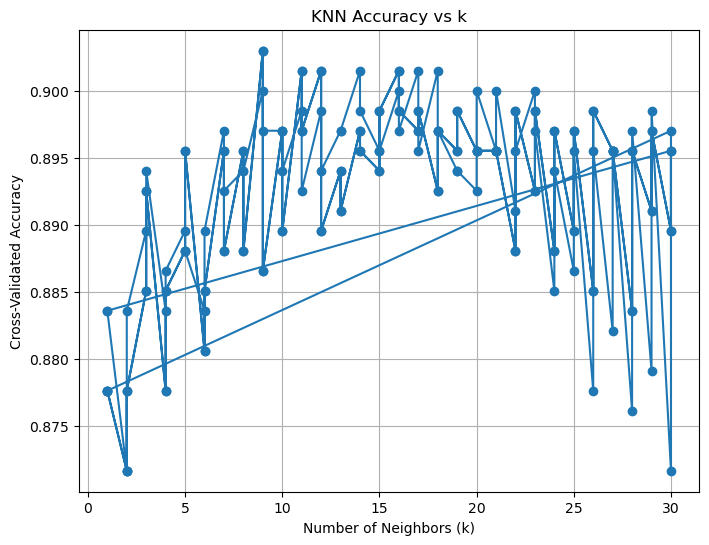

In [34]:
results = pd.DataFrame(grid_serch.cv_results_)
plt.figure(figsize=(8,6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy vs k')
plt.grid(True)
plt.show()